<a href="https://colab.research.google.com/github/alishba-cmd/RhombixTechnologies_Tasks/blob/main/Internship_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Step 1: Install necessary libraries
!pip install nltk wordcloud  #Natural Language Toolkit

In [17]:
# Step 2: Import libraries
import pandas as pd   #read data
import numpy as np    #for numbers
import matplotlib.pyplot as plt   #visualiza
import seaborn as sns             #graphs
import nltk                       #clean
import re
import string

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

from wordcloud import WordCloud

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from wordcloud import WordCloud

In [18]:
# Step 3: Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [20]:
# Step 4: Load dataset
columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='latin-1', names=columns)

# Convert sentiment labels (0 = negative, 4 = positive 4 is replaced by 1)
df['sentiment'] = df['sentiment'].map({0: 0, 4: 1})


In [22]:
# Step 5: Text Cleaning Function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet)
    tweet = re.sub(r'@\w+|#', '', tweet)
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    tweet = re.sub(r'\d+', '', tweet)  # remove numbers
    tweet_tokens = tweet.split()
    filtered_words = [
        lemmatizer.lemmatize(word) for word in tweet_tokens if word not in stop_words
    ]
    return " ".join(filtered_words)

df['clean_text'] = df['text'].apply(clean_tweet)

In [23]:
# Step 6: Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment']

In [24]:
# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
# Step 8: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
# Step 9: Evaluate Model
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.7737875

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77    159494
           1       0.76      0.80      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



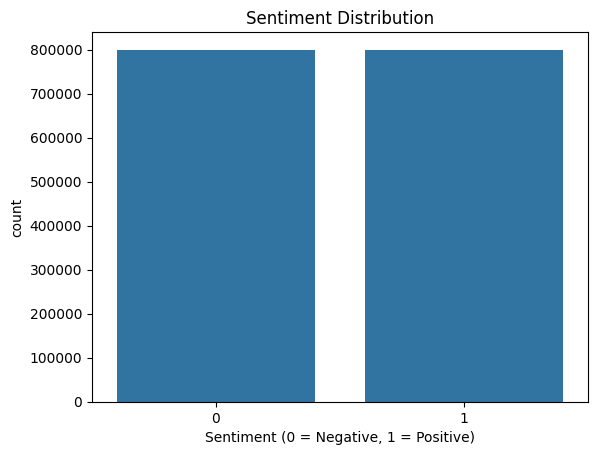

In [27]:
# Step 10: Sentiment Distribution Visualization
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.show()

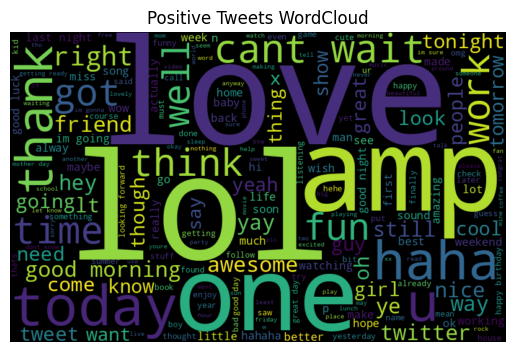

In [28]:
# Step 11: WordCloud for Positive Tweets
positive_words = ' '.join(df[df['sentiment'] == 1]['clean_text'])
wordcloud_positive = WordCloud(width=800, height=500).generate(positive_words)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Tweets WordCloud')
plt.show()

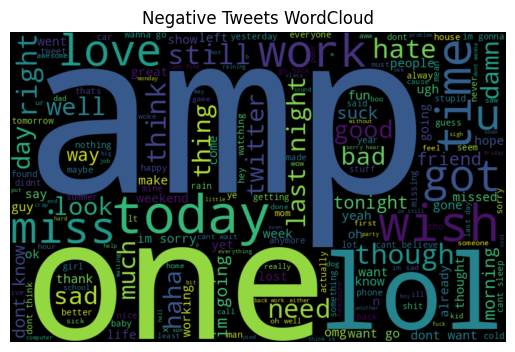

In [29]:
# Step 12: WordCloud for Negative Tweets
negative_words = ' '.join(df[df['sentiment'] == 0]['clean_text'])
wordcloud_negative = WordCloud(width=800, height=500).generate(negative_words)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Tweets WordCloud')
plt.show()